In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/merc.csv")
df.head()

model  year  price transmission  mileage fuelType  tax   mpg  \
0        SLK  2005   5200    Automatic    63000   Petrol  325  32.1   
1    S Class  2017  34948    Automatic    27000   Hybrid   20  61.4   
2   SL CLASS  2016  49948    Automatic     6200   Petrol  555  28.0   
3    G Class  2016  61948    Automatic    16000   Petrol  325  30.4   
4    G Class  2016  73948    Automatic     4000   Petrol  325  30.1   

   engineSize  
0         1.8  
1         2.1  
2         5.5  
3         4.0  
4         4.0

Kelin `scatterplot()` yordamida mashinalar narxi va ishlab chiqarilgan yili o'rtasida bog'liqlikni ko'ramiz.

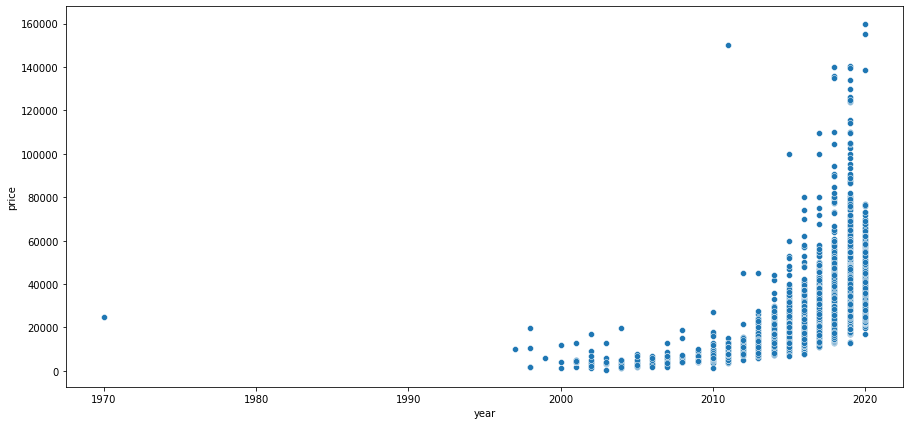

In [4]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=df, x='year', y='price')
plt.show()

Grafikdagi har bir nuqta bu - jadvaldagi `price` ustuni uchun har bir qatordagi qiymatlarni ko'rsatadi. Grafikdan biz quyidagi xulosani qilishimiz mumkin:
- Jadvaldagi aksar mashinalar 2000-yildan keyin ishlab chiqarilgan (nuqtalar zichligidan)
- Jadvalda 1 dona 1970 yilda ishlab chiqarilgan mashina bor (va u bizga kelajakda hisob-kitoblarda halaqit berishi mumkin)
- Narx va yil o'rtasida pozitiv korrelyasiya (bog'liqlik) bor, ya'ni mashinaning yili oshgan sari (qancha yangi bo'lsa) narxi ham shuncha baland ekan.

`regplot()` funksiyasi yordamida bu o'sishni ham chizib ko'rsatishimiz mumkin. Lekin, keling avval 1970-yil mashinani olib tahlaymiz.




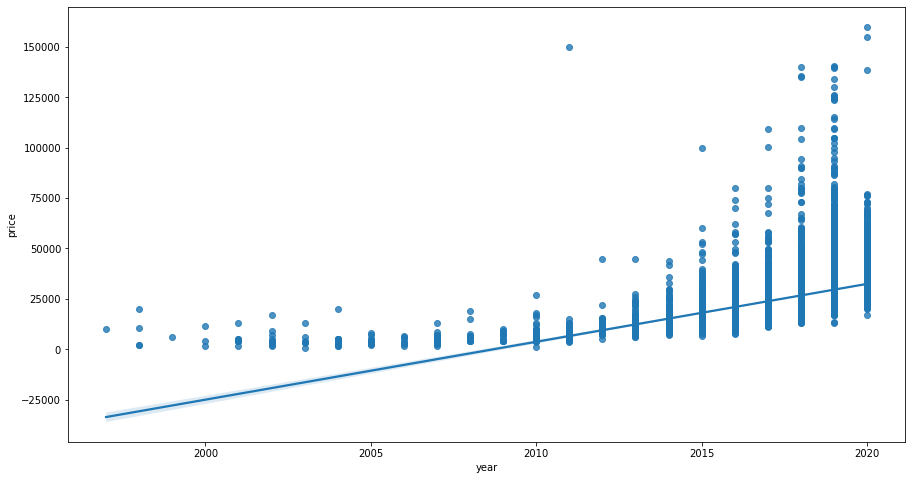

In [9]:
df=df[df.year>1970] # 1970 yilda chiqarilgan bir dona mashinani op tashaymiz
plt.figure(figsize=(15,8))
sns.regplot(data=df, x='year', y='price')
plt.show()

Grafikdagi to'gri chiziq **regressiya chizig'i (regression line)** deb ataladi va `x` va `y` o'qlardagi qiymatlar o'rtasidagi boqliqlikni ko'rsatadi.

Keling endi mashinaning narxi (`price`) va bosib o'tgan kilometri (`mileage`) o'rtasida bog'liqlikni ko'ramiz.

In [10]:
df.head()

model  year  price transmission  mileage fuelType  tax   mpg  \
0        SLK  2005   5200    Automatic    63000   Petrol  325  32.1   
1    S Class  2017  34948    Automatic    27000   Hybrid   20  61.4   
2   SL CLASS  2016  49948    Automatic     6200   Petrol  555  28.0   
3    G Class  2016  61948    Automatic    16000   Petrol  325  30.4   
4    G Class  2016  73948    Automatic     4000   Petrol  325  30.1   

   engineSize  
0         1.8  
1         2.1  
2         5.5  
3         4.0  
4         4.0

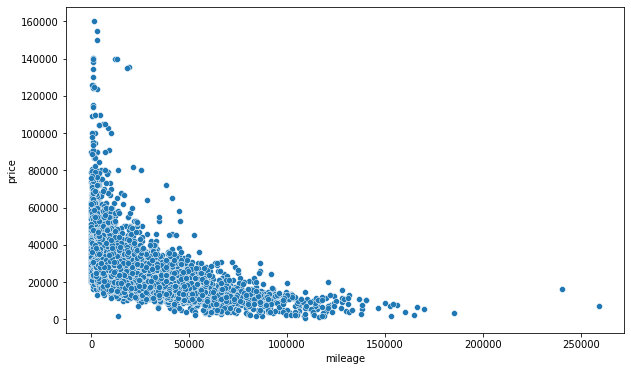

In [11]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x=df['mileage'], y=df['price'])
plt.show()

Bu grafikda biz negativ korrelyasiyani kuzatishimiz mumkin, y'ani, kilometri oshgan sari mashina narxi tushib borayapti.

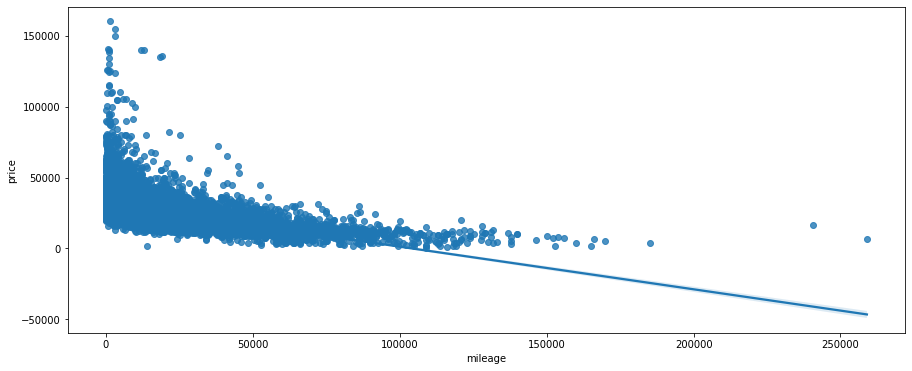

In [14]:
plt.figure(figsize=(15,6))
sns.regplot(x=df['mileage'], y=df['price'])
plt.show()

Keling grafigimizga 3-o'zgaruvchi, mashina korobkasi turini ham qo'shamiz (`transmission`) buning uchun `hue` parametridan foydalanamiz.

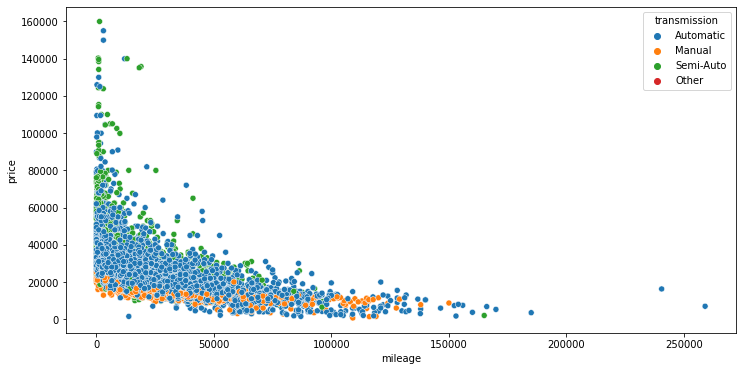

In [18]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df , x=df['mileage'], y=df['price'], hue='transmission')
plt.show()

Grafikdan qanday xulosalar qilishimiz mumkin:
- Aksar mashinalar avtomat korobka (`Automatic`)
- Mexanik (`Manual`) korobka mashinalar juda arzon (sariq rang)
- Yarim-avto (`Semi-auto`) mashinalar nisbatan qimmat


4-o'zgaruvchini qo'shish uchun esa `style` parametridan foydalanamiz:

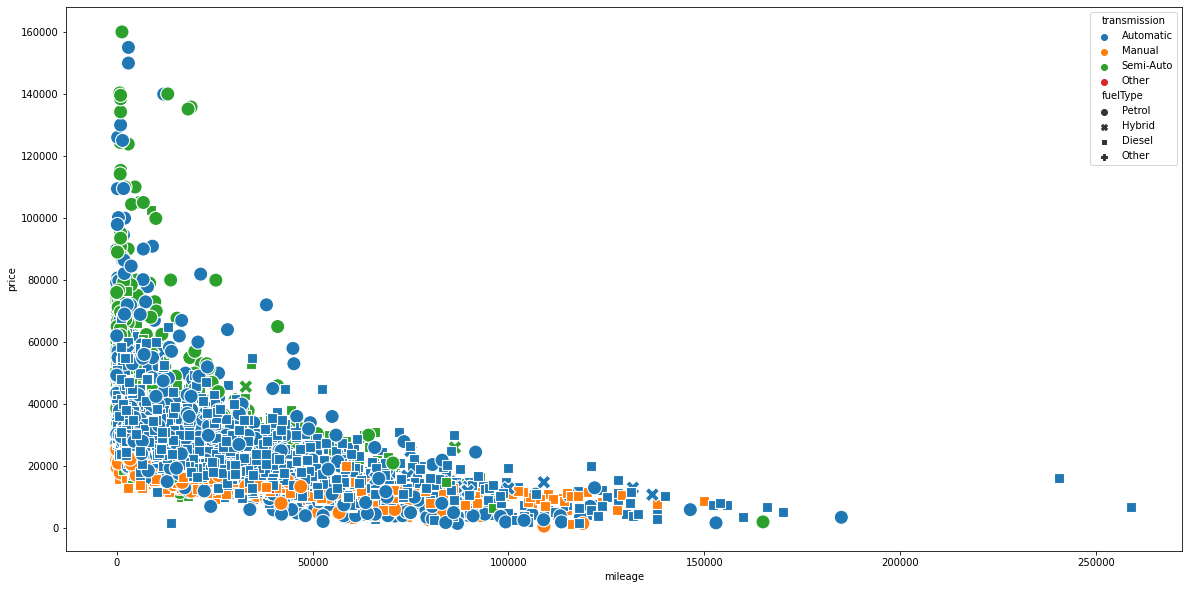

In [19]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df, x=df['mileage'], y=df['price'], hue="transmission", style="fuelType", s=200)
plt.show()

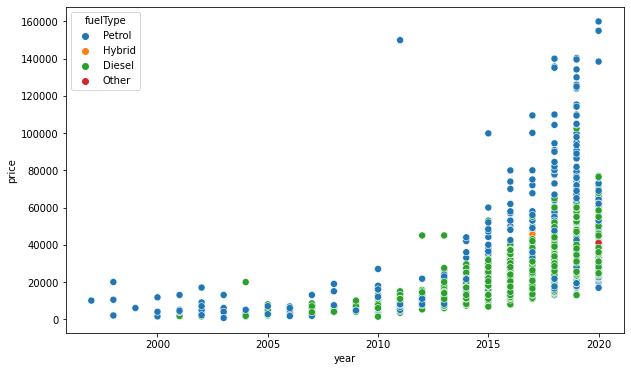

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x=df['year'], y=df['price'], hue="fuelType", s=50)
plt.show()

Scatter plotning ayan bir ko'rinishi bu Swarm plot. `swarmplot` yordamida yuqoridagi har bir kategoriyani (`transmission`) alohida swarm (to'da) ko'rinishida chiqarish mumkin.

**Diqqat!** `swarmplot`da kategoriyalar soni qancha ko'p bo'lsa, funksiya shuncha uzoq vaqt ishlaydi.

# https://seaborn.pydata.org/generated/seaborn.scatterplot.html
scatterplot uchun ma'lumotlar

In [22]:
  df.head()

model  year  price transmission  mileage fuelType  tax   mpg  \
0        SLK  2005   5200    Automatic    63000   Petrol  325  32.1   
1    S Class  2017  34948    Automatic    27000   Hybrid   20  61.4   
2   SL CLASS  2016  49948    Automatic     6200   Petrol  555  28.0   
3    G Class  2016  61948    Automatic    16000   Petrol  325  30.4   
4    G Class  2016  73948    Automatic     4000   Petrol  325  30.1   

   engineSize  
0         1.8  
1         2.1  
2         5.5  
3         4.0  
4         4.0

In [28]:
df = pd.read_csv("https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/merc.csv")
df=df[df.year>=2010] # 2010-yildan keyin chiqqan mashinalarni saqlab qolamiz
df=df[df.transmission!='Other'] # Faqat avtomat, mexanik va yarim-avtomat mashinalarni olib qolamiz
df=df[df.fuelType!='Other'] # Faqat benzin, dizel va gibrid mashinalarni olib qolamiz
df.head()

model  year   price transmission  mileage fuelType  tax   mpg  \
1    S Class  2017   34948    Automatic    27000   Hybrid   20  61.4   
2   SL CLASS  2016   49948    Automatic     6200   Petrol  555  28.0   
3    G Class  2016   61948    Automatic    16000   Petrol  325  30.4   
4    G Class  2016   73948    Automatic     4000   Petrol  325  30.1   
5   SL CLASS  2011  149948    Automatic     3000   Petrol  570  21.4   

   engineSize  
1         2.1  
2         5.5  
3         4.0  
4         4.0  
5         6.2

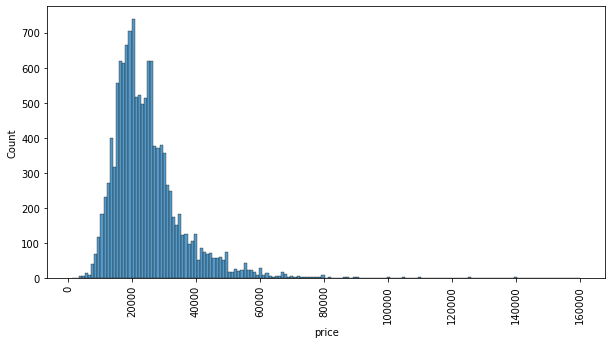

In [29]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='price')
plt.xticks(rotation=90)
plt.show()

`seaborn` da taqsimotlarni ko'rsatish uchun bir nechta funksiyalar mavjud.
Yuqorida ko'rganimiz `histplot` shulardan biri. Shuningdek, turli taqsimotlarni jamlaydigan yagona `displot` funksiyasi ham bor. 

`displot` yoki `histplot` qay biridan foydalanish sizning o'zingizga bog'liq. Bu ikkisining fariq shundaku, `histplot` va biz pastroqda ko'radigan `kdeplot`,  `ecdfplot` funksiyalari yordamida chizmaga ko'proq o'zgartirishlar kiritish mumkin.

Batafsil: https://seaborn.pydata.org/generated/seaborn.displot.html

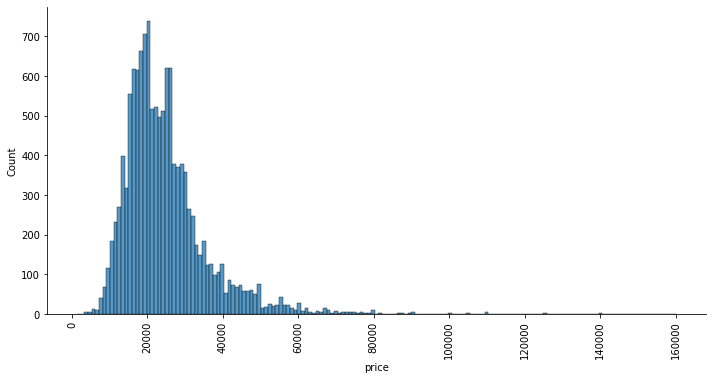

In [30]:
sns.displot(data=df, x='price', height=5, aspect=2)
plt.xticks(rotation=90)
plt.show()

Yuqoridagi grafikdan aksar mashinalarning narxi 20000$ ga yaqi ekanini ko'rishimiz mumkin. 

Keling jadvaldagi mashinalarning kilometri taqsimotini ko'ramiz:

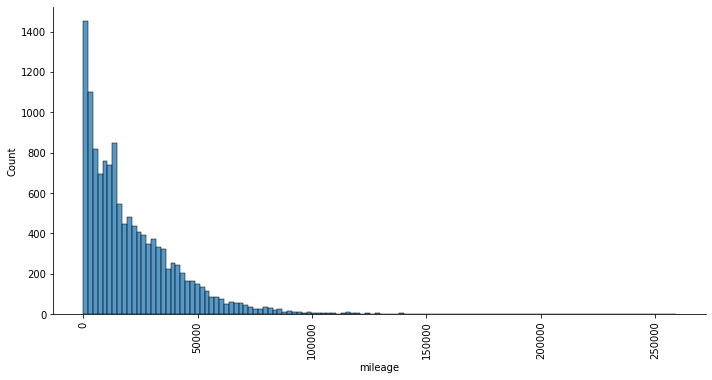

In [31]:
sns.displot(data=df, x='mileage', height=5, aspect=2)
plt.xticks(rotation=90)
plt.show()

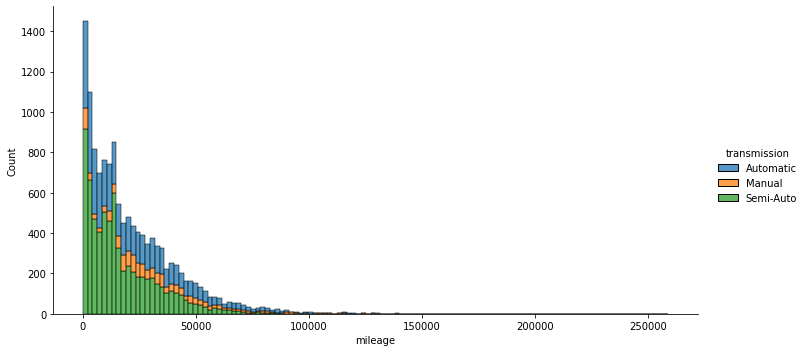

In [32]:
sns.displot(data=df, x="mileage", hue="transmission", multiple="stack", height=5, aspect=2) #qo'shimcha paramatr
plt.show()

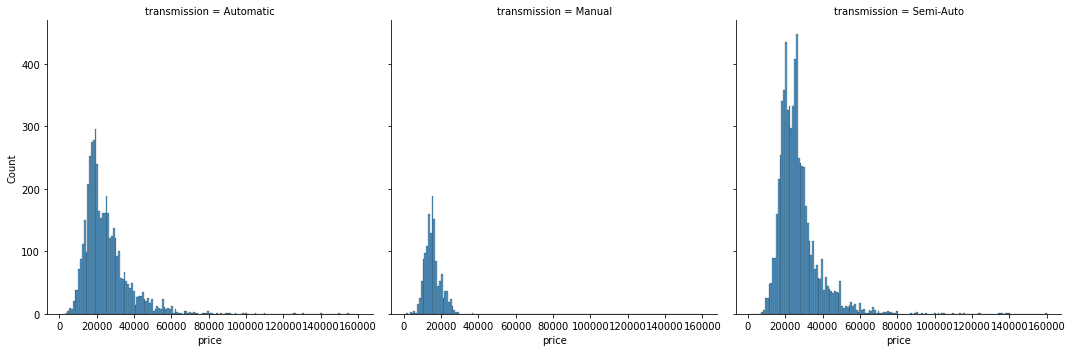

In [33]:
sns.displot(data=df, x="price", col="transmission", height=5, aspect=1) #col yordamida har birini alohida chizishimiz mumkin
plt.show()

### KDE - Kernel Density Estimation
Qiymatlar taqsimotini baholashning yana bir usuli bu - KDE, tasodifiy qiymatlar zichligini ko'rsatuvchi grafik. 
KDE haqida to'liq ma'lumot: https://en.wikipedia.org/wiki/Kernel_density_estimation (rus tilida ham bor)

KDE grafik uchun `displot` yoki maxsus `kdeplot` funksiylaridan foydalanishimiz mumkin:

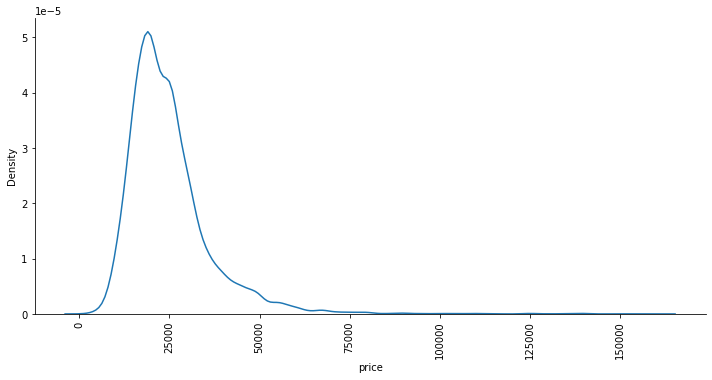

In [34]:
#displot
sns.displot(data=df, x='price', kind='kde', height=5, aspect=2) # height va aspect grafik hajmini berish uchun
plt.xticks(rotation=90)
plt.show()

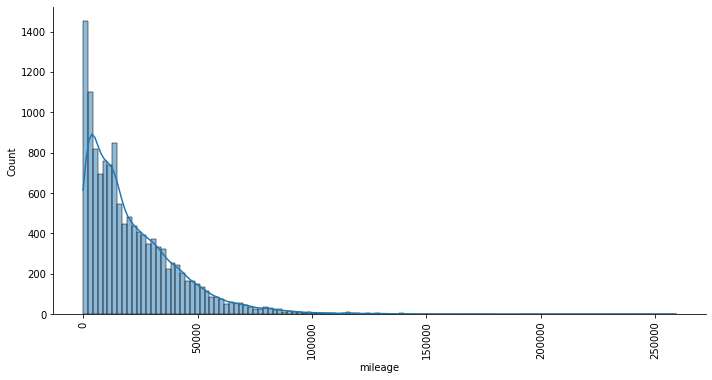

In [35]:
#`displot` yordamida Distribution va KDE jamlab chizish ham mumkin:
sns.displot(data=df, x='mileage', kde=True, height=5, aspect=2)
plt.xticks(rotation=90)
plt.show()

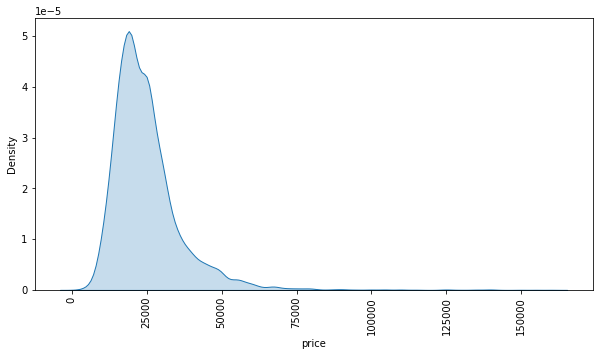

In [36]:
#kdeplot
plt.figure(figsize=(10,5))
sns.kdeplot(data=df, x='price', shade=True)
plt.xticks(rotation=90)
plt.show()

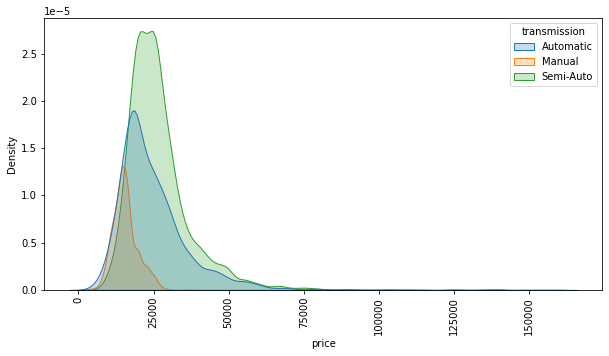

In [37]:
#`hue` parametri yordamida qo'shimcha o'zgaruvchini qo'shishimiz mumkin:
#kdeplot
plt.figure(figsize=(10,5))
sns.kdeplot(data=df, x='price', hue='transmission', shade=True)
plt.xticks(rotation=90)
plt.show()

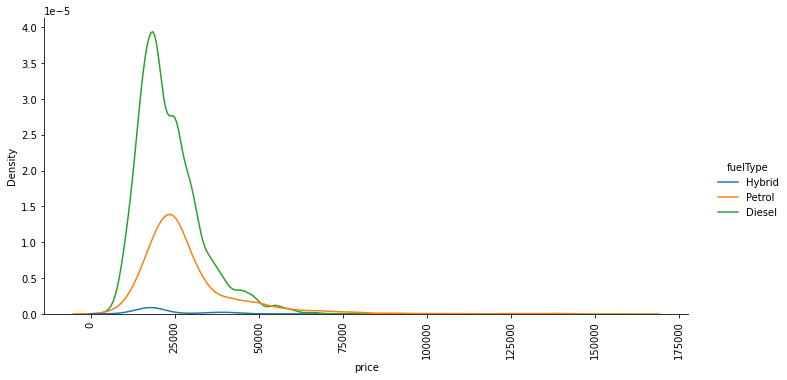

In [39]:
sns.displot(data=df, x='price', hue='fuelType', kind='kde', height=5, aspect=2)
plt.xticks(rotation=90)
plt.show()

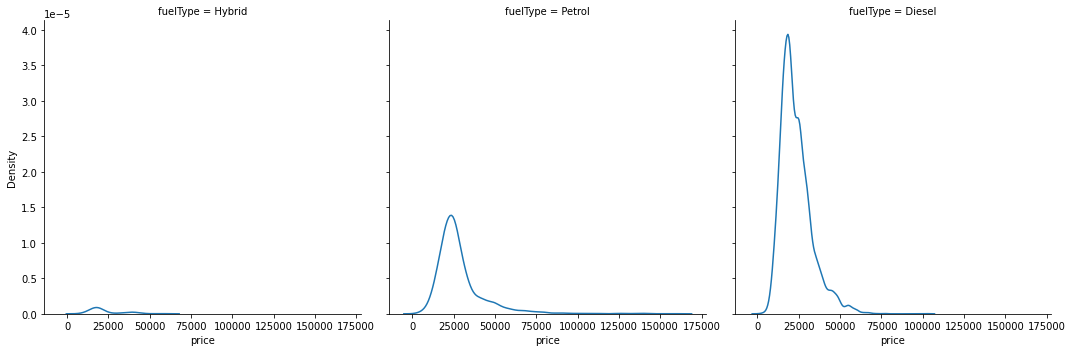

In [40]:
sns.displot(data=df, x="price", col="fuelType", kind='kde', height=5, aspect=1)
plt.show()

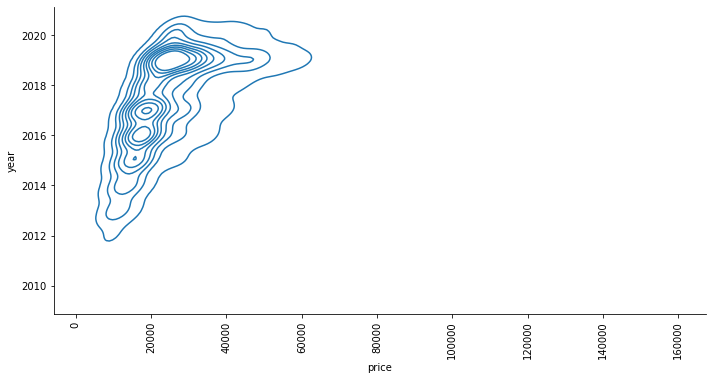

In [41]:
#### Ikki o'lchamli (2D) KDE
sns.displot(data=df, x="price", y="year", kind="kde", height=5, aspect=2)
plt.xticks(rotation=90)
plt.show()

## CDF - cumulative distribution function 
Kumulyativ taqsimot funksiyasi - berilgan qiymatning ehtimolligini ko'rsatuvchi parametr.

To'liq: https://en.wikipedia.org/wiki/Cumulative_distribution_function

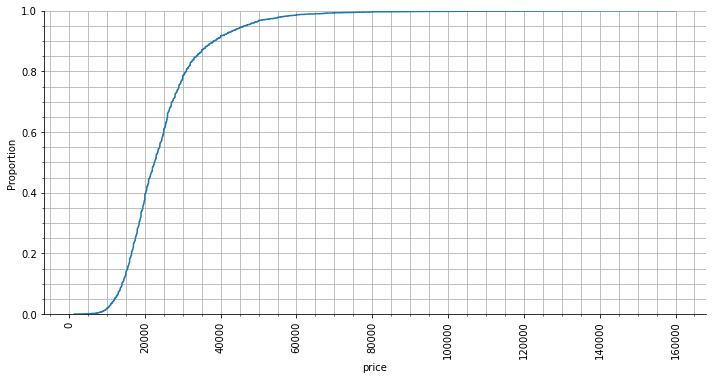

In [42]:
sns.displot(data=df, x="price", kind="ecdf", height=5, aspect=2)
plt.xticks(rotation=90)
plt.grid(which='both') # setka (major, minor, both) qiymatlarini berib ko'ring
plt.minorticks_on()
plt.show()

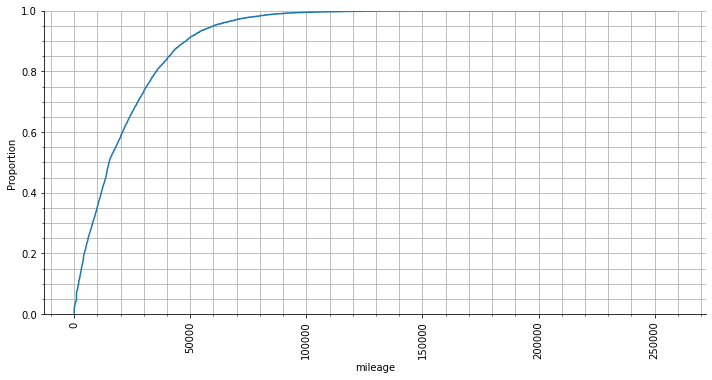

In [43]:
sns.displot(data=df, x="mileage", kind="ecdf", height=5, aspect=2)
plt.xticks(rotation=90)
plt.grid(which='both') # setka (major, minor, both) qiymatlarini berib ko'ring
plt.minorticks_on()
plt.show()

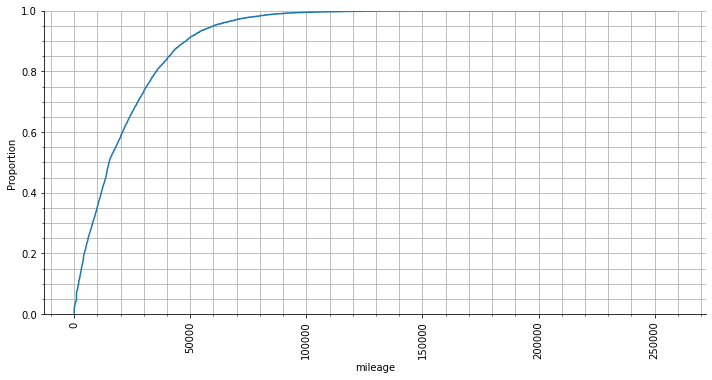

In [44]:
sns.displot(data=df, x="mileage", kind="ecdf", height=5, aspect=2)
plt.xticks(rotation=90)
plt.grid(which='both') # setka (major, minor, both) qiymatlarini berib ko'ring
plt.minorticks_on()
plt.show()

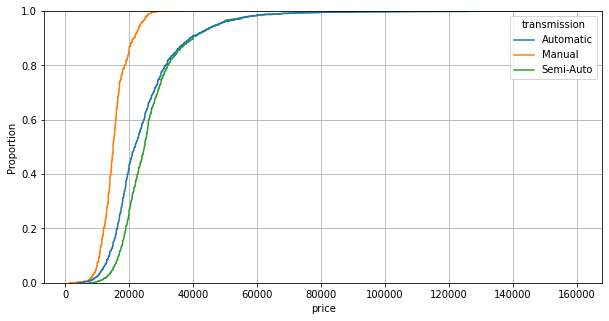

In [45]:
plt.figure(figsize=(10,5))
sns.ecdfplot(data=df, x="price", hue="transmission")
plt.grid()
plt.show()

https://seaborn.pydata.org/generated/seaborn.displot.html 
displot bo'yicha ma'lumotlar